In [1]:
from keras_facenet import FaceNet
import cv2
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
dataset = "dataset/images"

## Initiazling facenet embeder

In [3]:
embedder = FaceNet()

In [4]:
facenet_model = embedder.model
print(facenet_model.summary())

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)      (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (B  (None, None, None, 32)       96        ['Conv2d_1a_3x3[0][0]']       
 atchNormalization)                                                                               
                                                                                                  
 Conv2d_1a_3x3_Activation (  (None, None, None, 32)       0         ['Conv2d_1a_

In [5]:
img = cv2.imread("dataset/images/bibek/1.png")
emb = embedder.embeddings(np.expand_dims(img, axis=0))
len(emb[0])

1/1 [==============================] - 4s 4s/step


512

## Extracting Features

In [7]:
features = []  
labels = []
for root, files, images in os.walk(dataset):
    print(root.split("/")[-1])

    for image in images:
        
        img = cv2.imread(os.path.join(root, image))
        embedeing = embedder.embeddings(np.expand_dims(img,axis=0))
        features.append(embedeing)
        labels.append(root.split("/")[-1])


images
images\amit
1/1 [==============================] - 0s 76ms/step
images\bibek
1/1 [==============================] - 0s 100ms/step
images\jenisha
1/1 [==============================] - 0s 136ms/step


In [8]:
for index,label in enumerate(labels):
    labels[index] = label.split("\\")[-1]

# Get Features and Label

In [9]:
features = np.array(features)
fet = features[:,0,:]
labels = np.array(labels)

In [10]:
fet.shape

(2929, 512)

# Split

In [11]:
x_train, x_test , y_train, y_test =  train_test_split(fet, labels, test_size = 0.2, random_state=42)

# Fit

In [12]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
knn_predictions = knn.predict(x_test)
print("KNN Classification Report")
print(classification_report(y_test, knn_predictions))
print("KNN Accuracy: ", accuracy_score(y_test, knn_predictions))

KNN Classification Report
              precision    recall  f1-score   support

        amit       1.00      1.00      1.00       200
       bibek       1.00      1.00      1.00       192
     jenisha       1.00      1.00      1.00       194

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586

KNN Accuracy:  1.0


# Save

In [15]:
import joblib
joblib.dump(knn, 'face_attendance_model/emb_knn_model.pkl')

['face_attendance_model/emb_knn_model.pkl']

# Load and Test 

In [16]:
import matplotlib.pyplot as plt

classes = list(set(labels))

In [17]:
import joblib
knn = joblib.load("face_attendance_model/emb_knn_model.pkl")

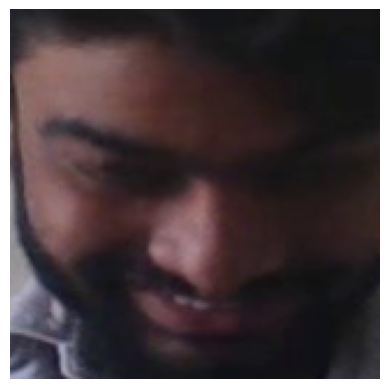

1/1 [==============================] - 0s 124ms/step
['amit']
[[1. 0. 0.]]


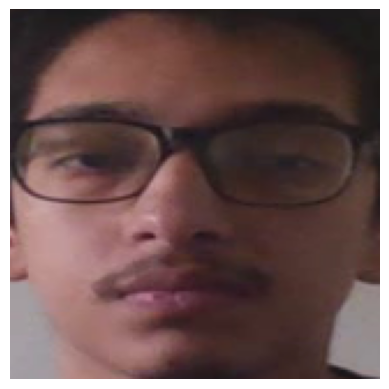

1/1 [==============================] - 0s 118ms/step
['bibek']
[[0. 1. 0.]]


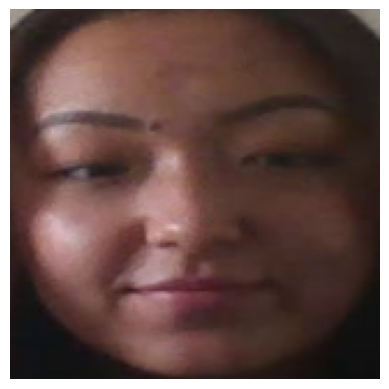

1/1 [==============================] - 0s 124ms/step
['jenisha']
[[0. 0. 1.]]


In [18]:
for i in range(len(classes)):
    index = np.random.randint(1,1000)
    try:
        img = cv2.imread(f"dataset/images/{classes[i]}/{index}.png")
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        emb=  embedder.embeddings(np.expand_dims(img,axis=0))
        
        prediction = knn.predict(emb)
        print(prediction)
        proba = knn.predict_proba(emb)
        print(proba)
        
    except Exception as e:
       print(e)

# SVM

In [19]:
svm = SVC(probability=True)
svm.fit(x_train, y_train)

SVC(probability=True)

In [22]:
svm_predictions = svm.predict(x_test)
print("SVC Classification Report")
print(classification_report(y_test, svm_predictions))
print("SVC Accuracy: ", accuracy_score(y_test, svm_predictions))

SVC Classification Report
              precision    recall  f1-score   support

        amit       1.00      1.00      1.00       200
       bibek       1.00      1.00      1.00       192
     jenisha       1.00      1.00      1.00       194

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586

SVC Accuracy:  1.0


# Save

In [23]:
import joblib
joblib.dump(svm, 'face_attendance_model/emb_svm_model.pkl')

['face_attendance_model/emb_svm_model.pkl']

In [24]:
import joblib
svm = joblib.load("face_attendance_model/emb_svm_model.pkl")

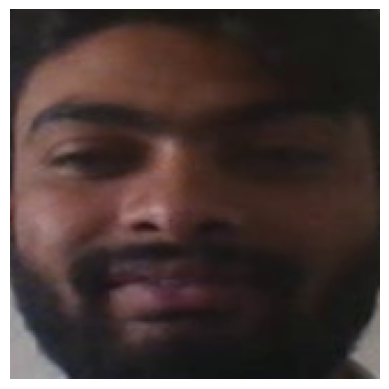

1/1 [==============================] - 0s 148ms/step
['amit']
[[9.97799072e-01 1.50033554e-03 7.00592468e-04]]


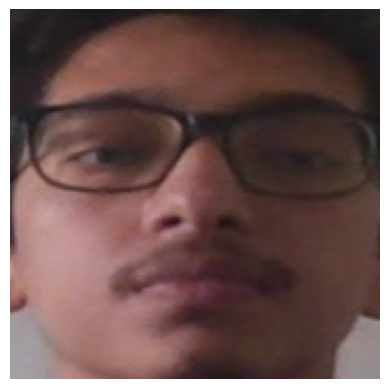

1/1 [==============================] - 0s 141ms/step
['bibek']
[[1.28071808e-06 9.99498414e-01 5.00305781e-04]]


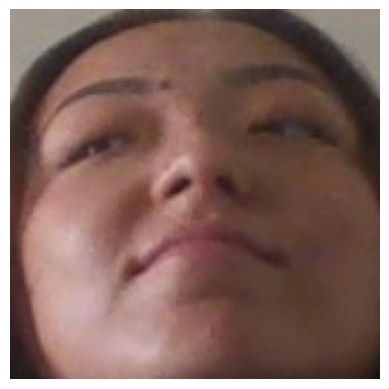

1/1 [==============================] - 0s 129ms/step
['jenisha']
[[9.58900604e-04 1.85365534e-03 9.97187444e-01]]


In [25]:
for i in range(len(classes)):
    index = np.random.randint(1,1000)
    try:
        img = cv2.imread(f"dataset/images/{classes[i]}/{index}.png")
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        emb=  embedder.embeddings(np.expand_dims(img,axis=0))
        
        prediction = svm.predict(emb)
        print(prediction)
        proba = svm.predict_proba(emb)
        print(proba)
        
    except Exception as e:
       print(e)